In [5]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [6]:
# Add the scripts directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Navigate up one level to project root
scripts_path = os.path.join(project_root, 'scripts')
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

In [7]:
from user_experiance import UserExperienceAnalysis

In [8]:
# Load the data from CSV file
data_file = "D:\\10x\\Projects\\Telecom-Customer-Behavior-and-Engagement-Insights/Data/updated_data.csv"  # Replace with the path to your CSV file
data = pd.read_csv(data_file)

In [10]:
# Aggregate metrics
aggregated_data = data.groupby('MSISDN/Number').agg({
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

print("\nAggregated Metrics:")
print(aggregated_data.head())


Aggregated Metrics:
   MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0   3.360100e+10             46.0              0.0                     37.0   
1   3.360100e+10             30.0              1.0                     48.0   
2   3.360100e+10              NaN              NaN                     48.0   
3   3.360101e+10             69.0             15.0                    204.0   
4   3.360101e+10             57.0              2.5                  20197.5   

   Avg Bearer TP UL (kbps)                    Handset Type  Total DL (Bytes)  \
0                     39.0  Huawei P20 Lite Huawei Nova 3E      8.426375e+08   
1                     51.0          Apple iPhone 7 (A1778)      1.207552e+08   
2                     49.0                       undefined      5.566597e+08   
3                     44.0         Apple iPhone 5S (A1457)      4.019932e+08   
4                   8224.5         Apple iPhone Se (A1723)      1.363130e+09   

   Total UL (Bytes)  
0

In [11]:
# Clean data
for col in ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']:
    aggregated_data[col].fillna(aggregated_data[col].mean(), inplace=True)
    q1 = aggregated_data[col].quantile(0.25)
    q3 = aggregated_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    aggregated_data[col] = aggregated_data[col].clip(lower_bound, upper_bound)

print("\nCleaned Data:")
print(aggregated_data.head())


Cleaned Data:
   MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0   3.360100e+10        46.000000         0.000000                     37.0   
1   3.360100e+10        30.000000         1.000000                     48.0   
2   3.360100e+10       164.676454        24.017374                     48.0   
3   3.360101e+10        69.000000        15.000000                    204.0   
4   3.360101e+10        57.000000         2.500000                  20197.5   

   Avg Bearer TP UL (kbps)                    Handset Type  Total DL (Bytes)  \
0                     39.0  Huawei P20 Lite Huawei Nova 3E      8.426375e+08   
1                     51.0          Apple iPhone 7 (A1778)      1.207552e+08   
2                     49.0                       undefined      5.566597e+08   
3                     44.0         Apple iPhone 5S (A1457)      4.019932e+08   
4                   6421.5         Apple iPhone Se (A1723)      1.363130e+09   

   Total UL (Bytes)  
0      

C:\Users\yetimeshet.tadesse\AppData\Local\Temp\ipykernel_30800\1018034764.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregated_data[col].fillna(aggregated_data[col].mean(), inplace=True)
C:\Users\yetimeshet.tadesse\AppData\Local\Temp\ipykernel_30800\1018034764.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

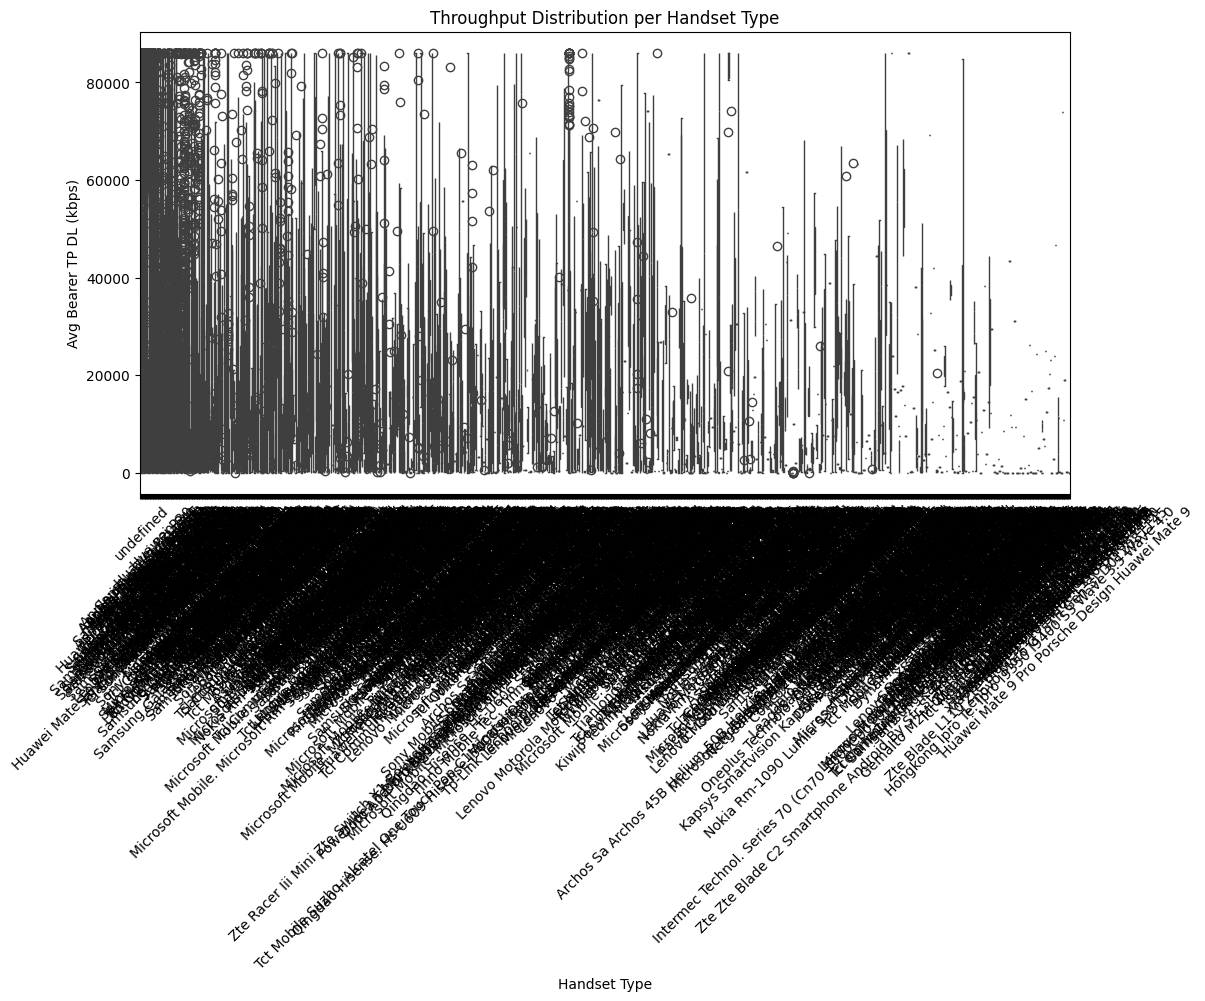

In [12]:
# Plot throughput distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=aggregated_data, x='Handset Type', y='Avg Bearer TP DL (kbps)')
plt.title("Throughput Distribution per Handset Type")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Perform clustering
feature_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(aggregated_data[feature_columns])

kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['Experience_Cluster'] = kmeans.fit_predict(scaled_features)

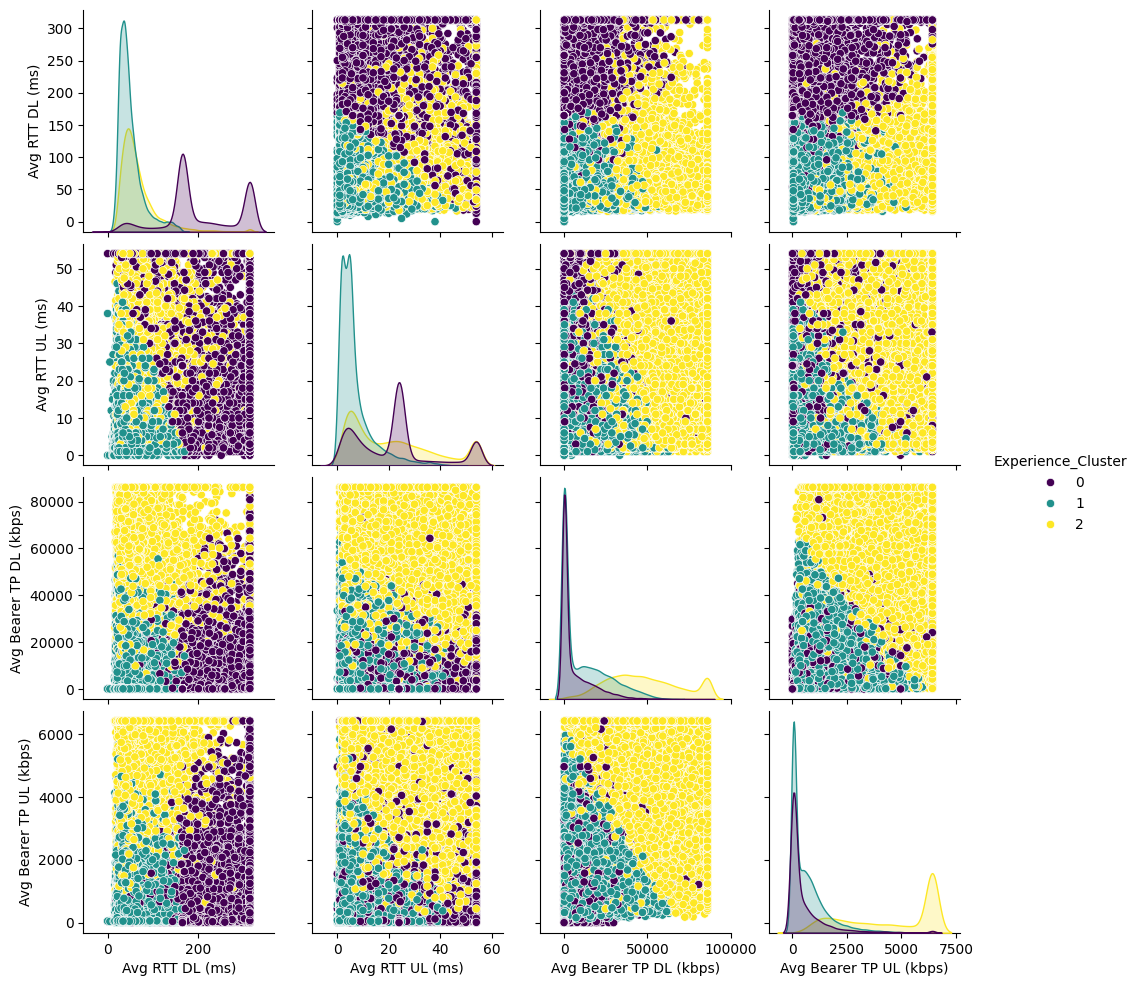

In [14]:
# Plot clusters
sns.pairplot(aggregated_data, vars=feature_columns, hue='Experience_Cluster', palette='viridis', diag_kind='kde')
plt.show()

In [16]:
# Save results
output_path = "user_experience_analysis_results.csv"
aggregated_data.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

Results saved to user_experience_analysis_results.csv
